# Stable Solvers: QR & Bidiagonal Matrix Optimization

### Part 1

#### Part (a)

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import linalg
np.set_printoptions(precision=14)

Here we look at LAPACK’s low level QR factorization routines and Householder transformations. Further details can be found in the lecture 18 notes. Recall that LAPACK returns a matrix of the form:
$$ \begin{pmatrix}
r_{11} & r_{12} & \ldots & r_{1n}\\
(v_{1})_{2} & r_{22} & \ldots & r_{2n}\\
(v_{1})_{3} & (v_{2})_{3} & \ddots & \vdots \\
\vdots & \vdots & \ddots & r_{nn} \\
 & & & (v_{n})_{n+1}\\
\vdots & \vdots & & \vdots \\
(v_{1})_{m} & (v_{2})_{m} & \ldots & (v_{n})_{m}
\end{pmatrix} $$

where the $r_{ij}$ are the entries of the upper triangular matrix R and the bottom entries are the vectors $v_{k}$ from the Householder transformations. Since $v_{k} = (0,...,0,1,∗,...,∗)^T$ where the 1 is in the $k^(\text{th})$ position, only the entries below the diagonal need to be stored. The $k^(\text{th})$ Householder reflection is $H_{k} = I - τ_{k}v_{k}v_{k}^T$, and
$$Q^T = H_{n}H_{n-1}...H_{1}, Q = H_{1}H_{2}...H_{n}. $$
In this problem, as A is a 3 × 2 matrix, we know the QR factorization will be of the form
$$ A = QR_{0} = Q\begin{pmatrix}
&\rlap{\kern-11ptR} \\
0 & 0
\end{pmatrix}, 
R = \begin{pmatrix}
r_{11} & r_{12} \\
0 & r_{22}
\end{pmatrix}. $$

We use the QR factorization to solve the least-squares problem:
$$ Ax \overset{\mathrm{LS}}{=} b \rightarrow QR_{0}x \overset{\mathrm{LS}}{=} b \rightarrow R_{0}x \overset{\mathrm{LS}}{=} Q^Tb =: y = \begin{pmatrix}
y_{1}\\
y_{2}\\
y_{3}
\end{pmatrix} $$
Since the last row of $R_0$ contains zeros, the best we can hope for is to solve
$$ Rx = \begin{pmatrix}
y_{1}\\
y_{2}
\end{pmatrix} \rightarrow y - R_{0}x = \begin{pmatrix}
0\\
0\\
y_{3}
\end{pmatrix}$$
which gives the least squares solution with error $||r|| = ||b - Ax|| = ||y - R_{0}x|| = |y_{3}|$ since $Q$ and $Q^T$ preserve the 2-norm.

In [24]:
A = np.array([-1,6,2,-1,2,-2]).reshape(3,2)
b = np.array([2,-1,-1]).reshape(3,1)
[qr,tau],R = linalg.qr(A,mode="raw")
y,work,info = linalg.lapack.dormqr("L","T", qr, tau, b, 1)
x = linalg.solve(R,y[0:2])
print(qr)
print(tau)
print(y)
print(x)
print("")

[[ 3.               -4.              ]
 [-0.5              -5.              ]
 [-0.5               0.33333333333333]]
[1.33333333333333 1.8             ]
[[-2. ]
 [-1.4]
 [ 0.2]]
[[-0.29333333333333]
 [ 0.28            ]]



In [25]:
print(22.0/75)

0.29333333333333333


The above results show that
$$ R = \begin{pmatrix}
3 & -4\\
0 & -5
\end{pmatrix},$$
$$v_{1} = (1,−0.5,−0.5)^T , v_{2} = (0,1,1/3)^T,$$
$$τ_{1} = 4/3, τ_{2} = 1.8,$$
$$||r|| = |y_{3}| = 0.2 \text{ and } x = (−22/75,0.28).$$

#### Part (b)

In [26]:
A = np.array([-1.4,0.16,3.2,2.92,3.2,3.92,1.6,-1.04]).reshape(4,2)
b = np.array([-2.44,0.72,-0.28,6.36]).reshape(4,1)
[qr,tau],R = linalg.qr(A,mode="raw")
y,work,info = linalg.lapack.dormqr("L","T", qr, tau, b, 1)
x = linalg.solve(R,y[0:2])
print(qr)
print(tau)
print(y)
print(x)
print("")

[[ 5.    4.  ]
 [-0.5  -3.  ]
 [-0.5   0.5 ]
 [-0.25 -0.5 ]]
[1.28             1.33333333333333]
[[3.]
 [6.]
 [1.]
 [1.]]
[[ 2.2]
 [-2. ]]



In [27]:
print(math.sqrt(2))

1.4142135623730951


The above results show that
$$ R = \begin{pmatrix}
5 & 4\\
0 & -3
\end{pmatrix},$$
$$v_{1} = (1,−0.5,−0.5, -0.25)^T , v_{2} = (0,1,0.5,-0.5)^T,$$
$$τ_{1} = 1.28, τ_{2} = 4/3,$$
$$ y = (3,6,1,1)^T$$
$$||r|| = √(y_{3}^2 + y_{4}^2) = √2 \text{ and } x = \begin{pmatrix}
2.2\\
-2
\end{pmatrix}.$$

#### Part (c)

In [28]:
A = np.array([-3,0,0]).reshape(3,1)
[qr,tau],R = linalg.qr(A,mode="raw")
print(qr,tau)

[[-3.]
 [ 0.]
 [ 0.]] [0.]


This example shows that LAPACK can replace the $k^\text{th}$ Householder reflection by the identity matrix (by setting $τ_{k}$ = 0) if that column already points along $e_{k}$, i.e., if all the entries below the main diagonal in that column are zero. Here A is 3 ×1 with all the entries below $a_{11}$ equal to zero, so there is no reason to apply a Householder reflection. (The whole point is to upper-triangularize A.)

In [29]:
A = np.array([-3,0,1.0e-18]).reshape(3,1)
[qr,tau],R = linalg.qr(A,mode="raw")
print(qr,tau)
print(1/6)

[[ 3.00000000000000e+00]
 [-0.00000000000000e+00]
 [-1.66666666666667e-19]] [2.]
0.16666666666666666


Here we added a tiny entry in the (3,1) position. LAPACK goes ahead with the Householder reflection since it is non-zero. So instead of $τ_{1} = 0$, we get $τ_{1} = 2$ in floating-point arithmetic. This
can be understood by considering
$$ A = (a), a = \begin{pmatrix}
-3 \\
0 \\
ϵ
\end{pmatrix}$$

Neglecting terms of order $ϵ^2$, we have
$$||a|| = √((−3)^2 + ϵ^2) = 3, w = a - ||a||e_{1} = \begin{pmatrix}
-6\\
0\\
ϵ
\end{pmatrix}, r = Ha = ||a||e_{1} = \begin{pmatrix}
3\\
0\\
0
\end{pmatrix}$$

$$ v = \frac{w}{w_{1}} = \begin{pmatrix}
1\\
0\\
-ϵ/6
\end{pmatrix}, τ = \frac{2}{||v||} = \frac{2}{√(1+ϵ^2/36)} = 2.$$

In the output above, the 3 is the first component of $r = Ha$ while $v_{1} = 1$ is not stored. Note that $v_{2} = 0$ and $v_{3} = -ϵ/6$, exactly as expected.

#### Part (d)

In [30]:
def createHilb(m,n):
    a = np.zeros((m,n))
    for j in range(n):
        for i in range(m):
            a[i,j] = 1.0/(1+i+j)
    return a

This part illustrates the relative numerical stability of solving least squares problems using the $QR$ factorization in comparison to solving the normal equations.

In [31]:
m = 12
n = 8
np.set_printoptions(precision=3)

A = createHilb(m,n)
x0 = np.random.rand(n,1)
b = A @ x0
[qr,tau],R = linalg.qr(A,mode="raw")
#print(qr)
y,work,info = linalg.lapack.dormqr("L", "T", qr, tau, b, 1)
x1 = linalg.solve(R,y[0:n])

AT = A.T
ATA = AT@A
ATb = AT@b
x2 = linalg.solve(ATA,ATb)
# print(np.shape(ATA))

e1 = x1-x0
e2 = x2-x0

print("     x0     x1     x2     x1 - x0     x2 - x0")
print(np.hstack((x0,x1,x2,e1,e2)))
print()
print(np.diag(R))
print()
print(f'Relative Error ||x1 - x0|| / ||x0||: {np.linalg.norm(e1)/np.linalg.norm(x0)}')
print(f'Relative Error ||x1 - x0|| / ||x0||: {np.linalg.norm(e2)/np.linalg.norm(x0)}')
print()

     x0     x1     x2     x1 - x0     x2 - x0
[[ 6.839e-01  6.839e-01  6.822e-01  2.079e-12 -1.698e-03]
 [ 9.282e-01  9.282e-01  1.011e+00 -9.043e-11  8.248e-02]
 [ 8.638e-01  8.638e-01 -1.339e-01  1.015e-09 -9.977e-01]
 [ 9.542e-01  9.542e-01  6.031e+00 -4.893e-09  5.077e+00]
 [ 6.915e-01  6.915e-01 -1.230e+01  1.201e-08 -1.300e+01]
 [ 7.590e-01  7.590e-01  1.838e+01 -1.576e-08  1.762e+01]
 [ 3.374e-01  3.374e-01 -1.176e+01  1.053e-08 -1.210e+01]
 [ 4.702e-01  4.702e-01  3.778e+00 -2.817e-09  3.308e+00]]

[-1.251e+00 -1.626e-01  1.467e-02  1.109e-03  7.231e-05  4.088e-06
 -2.001e-07 -8.413e-09]

Relative Error ||x1 - x0|| / ||x0||: 1.1074861523593513e-08
Relative Error ||x1 - x0|| / ||x0||: 12.315354007738733



/var/folders/9m/lrwb1sdd7838hlmbsg9xzky80000gn/T/ipykernel_2989/140356498.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.51943e-19): result may not be accurate.
  x2 = linalg.solve(ATA,ATb)


The relative error in $x_{1} - x_{0}$ is much smaller than in $x_{2} - x_{0}$ since the latter involved solving the normal equations, which “squares’’ the condition number. Note that there are 0 correct digits in some of the components of $x_{2}$.

In [32]:
print(f'Condition(A): {np.linalg.cond(A)}')
print(f'Condition(R): {np.linalg.cond(R)}')
print(f'Condition(R)^2: {np.linalg.cond(R)**2} <-- more accurate estimate of Condition(ATA)')
print(f'Condition(ATA): {np.linalg.cond(A.T @ A)} <-- corrupted by roundoff error in smallest singular value')

Condition(A): 1618345614.8484735
Condition(R): 1618345615.6998327
Condition(R)^2: 2.6190425318548705e+18 <-- more accurate estimate of Condition(ATA)
Condition(ATA): 4.888093304964901e+17 <-- corrupted by roundoff error in smallest singular value


Since $A^TA$ is nearly singular, floating-point error prevents the smallest singular value from being computed accurately. cond$(R)^2$ is a more accurate calculation of the condition number of $A^TA$ than cond$(A^TA)$ is. (Recall that the condition number is $σ_{1}/σ_{n}$).

### Part 2

Calculating $||B||_{1}$ is simple: we just go through each column and add $|a_{j}| + |b_{j+1}|$ to get the absolute column sum (except for the last column which has only $|a_{n}|$). This costs $n$ additions, one for each of the first $n$ columns of $B$, and $n$ comparisons to determine which one is the maximum.

Calculating $||B^{-1}||_{1}$ efficiently requires us to be more clever. Explicitly calculating the inverse would take $O(n^2)$ operations, which is far from optimal. Moreover, the inverse matrix itself is lower triangular so it has $O(n^2)$ nonzero entries. So even if we were given $B^{−1}$, this prevents us from applying the same naive implementation we used to calculate $||B||_{1}$ by just traversing the columns and adding up the nonzero entries (because again this would take $O(n^2)$ operations). The key is to re-use work in computing the norms $||y_{j}||$, where $y_{j}$ is the $j^{th}$ column of $B^{-1}$. We can forward-solve $By_{j} = e_{j}$ to obtain a formula for the components of $y_{j}$.

For $i<j$, we have y_{j}^i = 0.

Then equation $i = j$ is $a_{j}y_{j}^j = 1$, which gives $y_{j}^i = a_{j}^{-1}.$

For i > j, the $i^{th}$ equation is $b_{i}y_{j}^{i-1} + a_{i}y_{j}^i = 0, \text{ or } y_{j}^i = -\frac{b_{i}}{a_{i}}y_{j}^{i-1}.$ This leads to the product formula

$$\begin{equation}
 y_{j}^i = 
  \begin{cases}
  0, & 0 \leq i < j \\
  a_{j}^{-1}, & i = j \\
  \frac{1}{a_{j}}\prod_{k = j + 1}^{i} \frac{-b_{k}}{a_{k}}, & j + 1 \leq i \leq n
  \end{cases}
\end{equation}.$$

Let $γ_{j} = ||y_{j}||_{1} = \sum_{i = j}^{n}|y_{j}^i|$. Following the hint, we compute a few starting with $γ_{n}$ looking for a pattern:
$$γ_{n} = \frac{1}{|a_{n}|}$$
$$γ_{n-1} = \frac{1}{|a_{n-1}|}(1+\frac{|b_{n}|}{|a_{n}|}) = \frac{1}{|a_{n-1}|}(1 + |b_{n}|γ_{n})$$
$$γ_{n-2} = \frac{1}{|a_{n-2}|}(1+\frac{|b_{n-1}|}{|a_{n-1}|}(1+\frac{|b_{n}|}{|a_{n}|})) =  \frac{1}{|a_{n-2}|}(1 + |b_{n-1}|γ_{n-1})$$
$$γ_{n-3} = \frac{1}{|a_{n-3}|}(1+\frac{|b_{n-2}|}{|a_{n-2}|}(1+\frac{|b_{n-1}|}{|a_{n-1}|})(1+\frac{|b_{n}|}{|a_{n}|})) =  \frac{1}{|a_{n-3}|}(1 + |b_{n-2}|γ_{n-2})$$

Inspecting the general formula for $y_{j}^i$ above, we see that for 0 ≤ j < n,
$$γ_{j} = \frac{1}{|a_{j}|}(1 + \sum_{i = j+1}^{n} \prod_{k = j+1}^{i} \frac{|b_{k}|}{|a_{k}|}) =  \frac{1}{|a_{j}|}(1 + \frac{|b_{j+1}|}{|a_{j+1}|}(1 + \sum_{i = j+2}^{n} \prod_{k = j+2}^{i} \frac{|b_{k}|}{|a_{k}|})) = \frac{1}{|a_{j}|}(1 + |b_{j+1}|γ_{j+1}).$$

So we can compute all the $γ_{j}$ with a simple loop:
$$ γ_{n} = 1/|a_{n}|$$
$$ \text{for } j = n - 1 \text{ down to } 0: $$
$$ γ_{j} = (1 + |b_{j+1}|γ_{j+1})/|a_{j}|$$

This involves $n$ additions, $n$ multiplications, and $n + 1$ divisions. We will also need $n$ comparisons to keep track of the largest $γ_{j}$.

The final algorithm to compute $||B||_{1}||B^{-1}||_{1}$ then involves $2n$ additions, $n + 1$ multiplications (the last one to multiply $||B||_{1}$ by $||B^{-1}||_{1}$), $n + 1$ divisions, $2n + 1$ absolute values (each $a_{k}$ and $b_{k}$ can be replaced by |a_{k}| and |b_{k}| just once for both $||B||_{1}$ and $||B^{-1}||_{1}$), and $2n$ comparisons.

In [33]:
def kappa1(a, b):
    """
    Compute the 1-norm condition number of a lower bidiagonal matrix B.
    
    Parameters:
        a (array): Diagonal entries of B (length n+1).
        b (array): Subdiagonal entries of B (length n).
    
    Returns:
        kappa (float): The 1-norm condition number of B.
    """
    n = len(b)
    aa = abs( a[n] )
    mx0 = aa; # for ||B||
    gam = 1/aa;
    mx1 = gam; # for ||B^{-1}||
    for j in range(n,0, -1): # n,n-1,...,1
        aa = abs( a[j-1] )
        bb = abs( b[j-1] ) # it's b[j] in the notation of the problem
        sum = aa + bb
        if sum>mx0:
            mx0=sum
        gam = (1+gam*bb)/aa
        if gam>mx1:
            mx1=gam
    return mx0*mx1

2.9999985694885254
6291453.0


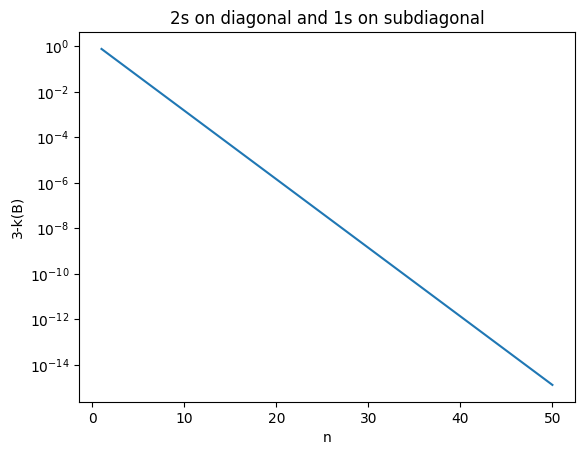

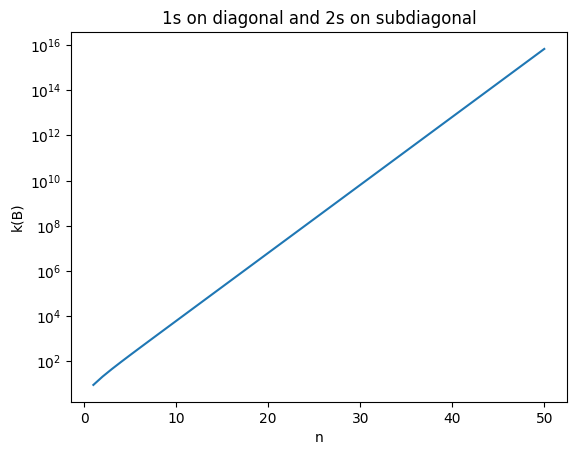

In [34]:
# v1[n-1] will store the condition number of the $(n+1)\times(n+1)$ matrix B
# with 2's on the diagonal and 1's on the subdiagonal
v1 = np.zeros(50)

# v1[n-1] will store the condition number of the $(n+1)\times(n+1)$ matrix B
# with 1's on the diagonal and 2's on the subdiagonal
v2 = np.zeros(50)

for n in range(1,51): # n=1:50
    a = np.ones(n+1)
    b = np.ones(n)

    # 2's on the main diagonal and 1's on the subdiagonal
    v1[n-1] = kappa1(2*a,b)

    # 1's on the main diagonal and 2's on the subdiagonal
    v2[n-1] = kappa1(a,2*b)

print(float(v1[19])) # n=20
print(float(v2[19])) # n=20

plt.xlabel('n')
plt.ylabel('3-k(B)')
plt.title('2s on diagonal and 1s on subdiagonal')
plt.semilogy(range(1,51),3-v1)
plt.show()

plt.xlabel('n')
plt.ylabel('k(B)')
plt.title('1s on diagonal and 2s on subdiagonal')
plt.semilogy(range(1,51),v2)
plt.show()

In the first case, the condition number converges rapidly to 3 from below. Indeed, we see that $3−κ(B)$ decays exponentially, which leads to the straight line on the semilog plot. In the second
case, the condition number grows exponentially.